In [5]:
%load_ext autoreload
%autoreload 2

In [7]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader
import cnn
from dataloader import FaceKeypointsDataset, part2_augment
from display import *
from learn import test, train

In [20]:
ROOT_DIR = Path("data/imm_face_db")

# Initialite Datasets

transform = part2_augment
# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = FaceKeypointsDataset(
    idxs=np.arange(33), root_dir=ROOT_DIR, transform=transform
)
assert len(training_set) == 192, len(training_set)

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = FaceKeypointsDataset(
    idxs=np.arange(32, 40), root_dir=ROOT_DIR, transform=transform
)
assert len(validation_set) == 48

# Initialize Dataloaders
batch_size = 25
train_loader = DataLoader(training_set, batch_size, shuffle=True)
test_loader = DataLoader(validation_set, batch_size, shuffle=False)

sample 150


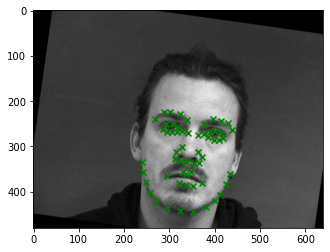

sample 172


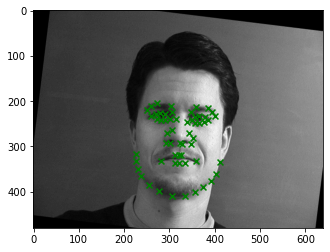

sample 112


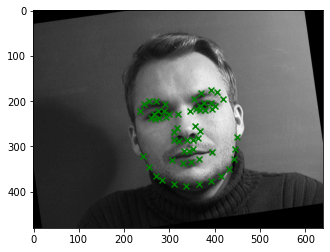

sample 148


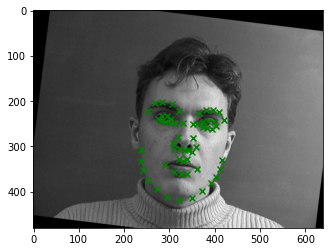

sample 169


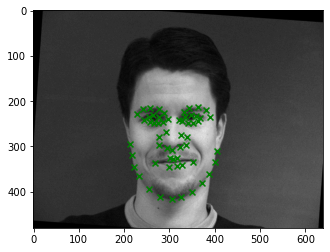

In [29]:
# Plotting a few input images and their face keypoints.
for i in np.random.randint(0, 192, size=5):
    print(f"sample {i}")
    sample = training_set[i]
    image, points = sample
    show_keypoints(image, points)
    print()

In [15]:
# Training and Testing

epochs = 1
learn_rate = 0.001
show_every = 3
loss_per_epoch = []
for ep in range(epochs):
    print(f"========== Start Epoch {ep} ==========")
    trained_model, train_loss = train(
        train_loader, cnn.FaceFinder(), learn_rate
    )
    _, valid_loss = test(test_loader, trained_model, show_every)
    
    print_epoch(ep, train_loss, valid_loss)
    loss_per_epoch.append([train_loss, valid_loss])

  0%|          | 0/8 [00:00<?, ?it/s]========== Start Epoch 0 ==========



AssertionError: 47.44459533691406, -29.387346267700195